### Validate Binary Search Tree
---
Given the root of a binary tree, determine if it is a valid binary search tree (BST).

A valid BST is defined as follows:

- The left subtree of a node contains only nodes with keys less than the node's key.
- The right subtree of a node contains only nodes with keys greater than the node's key.
- Both the left and right subtrees must also be binary search trees.

|Input|Output|Explanation|
|:--|:--|:--|
|root = [2,1,3]|true||
|root = [5,1,4,null,null,3,6]|false|The root node's value is 5 but its right child's value is 4.|
>$Constraints:$  
>- $The number of nodes in the tree is in the range [1, 10^4].$
>- $-2^(31) <= Node.val <= 2^(31) - 1$

In [1]:
import java.time.Duration;
import java.time.Instant;

class TreeNode {
    int val;
    TreeNode left;
    TreeNode right;
    TreeNode() {}
    TreeNode(int val) { this.val = val; }
    TreeNode(int val, TreeNode left, TreeNode right) {
        this.val = val;
        this.left = left;
        this.right = right;
    }
}

In [2]:
class Solution {
    public boolean isValidBST(TreeNode root) {
        Queue<CheckTree> queue = new LinkedList<>();
        queue.add(new CheckTree(root, null, null));

        while(!queue.isEmpty()){
            CheckTree currentTree = queue.poll();
            TreeNode currentNode = currentTree.node;

            if(currentNode.left != null) {
                if(currentNode.left.val < currentNode.val && (currentTree.min == null ||
                    (currentTree.min != null && currentTree.min.intValue() < currentNode.left.val))) {
                    queue.add((new CheckTree(currentNode.left, currentTree.min, currentNode.val)));
                } else {
                    return false;
                }
            }
            
            if(currentNode.right != null) {
                if(currentNode.val < currentNode.right.val && (currentTree.max == null ||
                (currentTree.max != null && currentTree.max.intValue() > currentNode.right.val))) {
                    queue.add((new CheckTree(currentNode.right, currentNode.val, currentTree.max)));
                } else {
                    return false;
                }
                
            }

        }
        return true;
    }
}


In [3]:
class CheckTree {
    TreeNode node;
    Integer min;
    Integer max;

    CheckTree (TreeNode node, Integer min, Integer max) {
        this.node = node;
        this.min = min;
        this.max = max;
    }
}

In [9]:
TreeNode root = new TreeNode(2, new TreeNode(1), new TreeNode(3));
Solution solution = new Solution();

/* Measure execution time */
Instant start = Instant.now();
boolean result = solution.isValidBST(root);
Instant finish = Instant.now();
result

true

In [10]:
Duration.between(start, finish).toMillis();

20

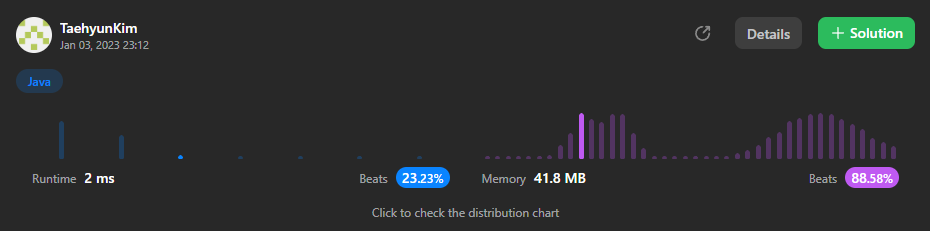

### recursive solution
---

In [6]:
class RecursiveSolution {
    public static boolean check(TreeNode root , TreeNode min , TreeNode max){
        if(root == null ) return true;
        
        if(min!= null  && root.val<=min.val) return false;
        else if(max!=null && root.val>=max.val) return false;
        
        return check(root.left,min,root ) && check(root.right , root,max);
        }
    
    public boolean isValidBST(TreeNode root) {
       return check(root,null,null);
    }
}

In [7]:
RecursiveSolution recursiveSolution = new RecursiveSolution();

/* Measure execution time */
start = Instant.now();
result = recursiveSolution.isValidBST(root);
finish = Instant.now();
result

true

In [8]:
Duration.between(start, finish).toMillis();

34